# **Requirement: What should do?**

- Based on learned knowledge to select data structure and design  algorithms for merge sort algorithms.
- Conditions: Using parallel algorithms

## Roles:
- Customers: Teacher and some students
- Author: Pair 8:
  - Hoàng Ngọc Quân
  - Cẩm Giang

# **Work Process Model:**
- Model Type: Waterfall (Step-driven)  
  - Spec Summary
  - Idea Tutorial
  - Design algorithms
  - Implement code
  - Validation  
  - Report documents

# **Activiti (0): Spec Summary**
- Outcome:
  - Problem Abstraction
  - Define Input and Output of problem
  - Define Conditions of problem

## Problem Abstraction
- Problem:
  - Give an array including ***n*** non-negative integer numbers ***a***.
  - Requirement: design a function that help sort ***a***

- Input:
  - array ***a***, python-type: list
- Output - Return:
  - array ***a*** after sort, python-type: list

- Conditions:
  - using **parallel program** to optimize rate for code  


# **Activiti (1): Idea Tutorial**
- Outcome:
  - some comment about problem and task

## Hint
- A computer that have many processor to implement a program
- So, To implement a job, we may divide data to several independence parts
- Then, Implement computation on each part a parallel way and combine outcome of them


# **Activiti (2): Design**
- Outcome:
  - Algorithms
  - Diagram
  - Evaluate the Big-O
  - Data Structure that need use

## Step to Step
- Divide input data into k sublists
- Implement Merge Sort on each list a parallel way
- Then, merge k sublists into output data



## Diagram

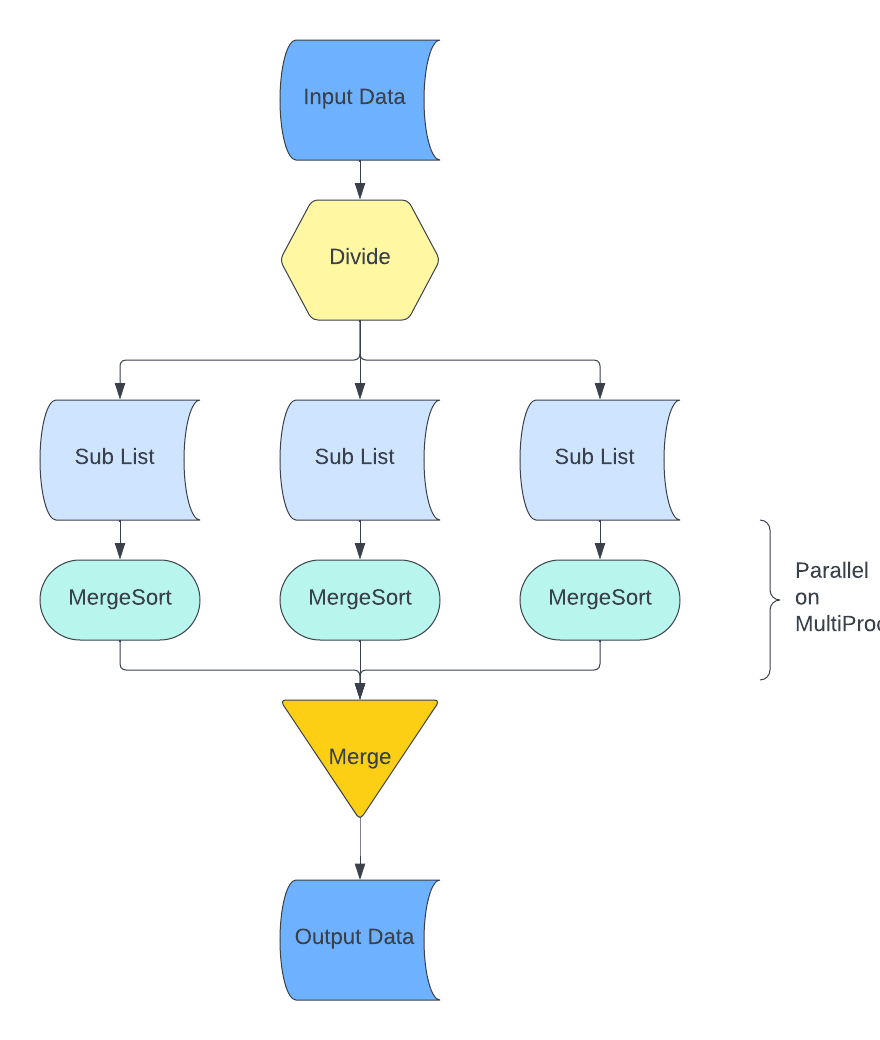

## Big-O

- Let:
  - ***n***: the number of elements in the input data
  - ***k***: the number of sublists that are divided

- Remind:
  - Big-O of Normal Merge Sort: O(n * log(n))

- Time:
  - Divide input data: ***O(n)***
  - Merge Sort on k sublists: ***O((n/k) * log(n/k))***, because each sublist is performed simultaneously
  - Merge k sublists into output data: ***O(n)***
  - Besides, with parallel algorithms we need to pay more attention to the initialization time of the parallel process, temporarily denoted as ***O(H)***
  - Overall: ***O(2n + (n/k) * log(n/k) + H)***
  - => when n and k gets larger, then O(2n + (n/k) * log(n/k) + H) < O(n * log(n)), so the parallel version of merge sort is better than its original version

- Space: ***O(n)***

## Support Data Structure

-  *List* to store input and output data, as well as generated data
- *Pool* to implement Merge Sort simultaneously
- *multiprocessing library*

# **Activiti (3): Implement**

## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool

## Constant

In [ ]:
NUMBER_PROCESSOR = os.cpu_count()
NUMBER_PROCESSOR

2

## Utils

In [ ]:
# api merge
def __init__():
  pass

def merge(listoflist: list) -> list:
  '''
  - This is a function that will merge k lists
  - inputs:
    - listoflist: list of k lists, type: list, shape: (k, +)
  - return:
    - a list of k lists after merge, type: list, shape (+)
  '''
  cursors = [[i, 0] for i in range(len(listoflist))]
  tmpData = []

  while len(cursors) > 0:
    valueMin = listoflist[cursors[0][ 0]][ cursors[0][ 1]]
    curHome = 0
    for i in range(len(cursors)):
      cur = cursors[i]
      if listoflist[cur[0]][ cur[1]] < valueMin:
        valueMin = listoflist[cur[0]][ cur[1]]
        curHome = i

    tmpData += [listoflist[cursors[curHome][ 0]][ cursors[curHome][ 1]]]
    cursors[curHome][ 1] += 1
    if cursors[curHome][ 1] >= len(listoflist[cursors[curHome][ 0]]):
      cursors.pop(curHome)

  return tmpData

def mergeSort(a: list) -> list:
  '''
  - This is a function that implement merge sort algorithms
  - inputs:
    - a: list that need sort, type: list, shape: (+)
  - return:
    - list after sort, type: list, shape: (+)
  '''
  if len(a) < 2:
    return a
  mid = len(a) // 2
  x = mergeSort(a[:mid])
  y = mergeSort(a[mid:])
  return merge(listoflist=[x, y])

In [ ]:
def generateInput(maxValue: int = 10**18, size: tuple = (2 * 10**5), draw = False) -> list:
  """
  - This is a function to generate input data that is a list include 'size' integer numbers and have max value is 'maxValue'
  - inputs:
    - maxValue: type: int, default = 10**18
    - size: type: tuple, default = 2 * 10**5
  - return:
    - a list
  - note:
    - draw distribution of input data
  """
  input = np.random.randint(maxValue, size=size).tolist()
  if(draw == True):
    sns.displot(data = input)
  return input

In [ ]:
def divideInput(input: list, numberParts: int = NUMBER_PROCESSOR, isPermutation: bool = True) -> list:
  """
  - This is a function to divide input into k parts
  - inputs:
    - input: type: list, shape: (+)
    - numberParts: type: int, default = number of processor
    - isPermutation: yes or no permutate input-list, default = True
  - return:
    - a list of k parts, type: list, shape: (k, +)
  """
  tmp = np.random.permutation(input).tolist()
  sublists = np.array_split(tmp, numberParts, axis = 0)
  sublists = [sub.tolist() for sub in sublists]
  return sublists

## Demo

In [ ]:
input = generateInput(20, 15)
input

[15, 10, 16, 0, 0, 10, 11, 9, 7, 4, 6, 16, 8, 15, 5]

In [ ]:
subinputs = divideInput(input)
subinputs

[[15, 15, 6, 11, 0, 9, 10, 10], [16, 7, 8, 0, 5, 16, 4]]

In [ ]:
pool = Pool(NUMBER_PROCESSOR)
suboutputs = pool.map(mergeSort, subinputs)
suboutputs

[[0, 6, 9, 10, 10, 11, 15, 15], [0, 4, 5, 7, 8, 16, 16]]

In [ ]:
pool.close()
pool.join()

In [ ]:
output = merge(suboutputs)
output

[0, 0, 4, 5, 6, 7, 8, 9, 10, 10, 11, 15, 15, 16, 16]

In [ ]:
output == sorted(input)

True

In [ ]:
output == mergeSort(input)

True

## **Parallel PackPage**

In [ ]:
def parallelMergeSort(input: list, numberParts: int = NUMBER_PROCESSOR, isPer = False) -> list:
  # divide input into parts
  if(numberParts > len(input)):
    return sorted(input)
  subinputs = divideInput(input, numberParts = numberParts, isPermutation = isPer)
  # parallel running
  pool = Pool() # create pool of processors
  suboutputs = pool.map(mergeSort, subinputs)
  # close and join pool
  pool.close()
  pool.join()
  # merge
  output = merge(suboutputs)
  return output

# **Activiti (4): Validation**

controler for validation

In [ ]:
NUMBER_TESTCASE = 9
MAX = 10**5
SIZE = [(10**i) for i in range(NUMBER_TESTCASE)]

import time
NUMBER_FOLD = 3

# hardware affect
NUMBER_PARTS = 4
IS_PER = False

In [ ]:
SIZE

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [ ]:
# compute time for function
def computeTimeOfFunction(func, input, type, parts = NUMBER_PROCESSOR, isPer = False) -> float:
  runTime = time.perf_counter()
  if(type == False):
    func(input)
  else:
    func(input, parts, isPer)
  runTime = time.perf_counter() - runTime
  return round(runTime, 3)

test time and correct

In [ ]:
normal, parallel, numberN = [], [], []
np.random.seed(42)
for testcase in range(NUMBER_TESTCASE):
  # generate input data
  inputRoot = generateInput(MAX, SIZE[testcase])
  # inputRoot = list(range(10**5))

  run1, run2 = 0, 0
  out1, out2 = [], []
  for fold in range(NUMBER_FOLD):
    # normal version
    input = inputRoot.copy()
    runTime = time.perf_counter()
    out1 = mergeSort(input)
    runTime = time.perf_counter() - runTime
    run1 += runTime

    # parallel version
    input = inputRoot.copy()
    runTime = time.perf_counter()
    out2 = parallelMergeSort(input, NUMBER_PARTS, IS_PER)
    runTime = time.perf_counter() - runTime
    run2 += runTime

  # add time
  normal += [round(run1/NUMBER_FOLD, 3)]
  parallel += [round(run2/NUMBER_FOLD, 3)]
  numberN += [SIZE[testcase]]

  # check wrong
  input = inputRoot.copy()
  if(out1 != out2 or out1 != sorted(input)):
    print("WRONG ANSWER!!!")
  else:
    print("testcase {}: pass".format(testcase))

testcase 0: pass
testcase 1: pass
testcase 2: pass
testcase 3: pass
testcase 4: pass
testcase 5: pass
testcase 6: pass
testcase 7: pass
testcase 8: pass


# **Activiti (5): Report**

In [ ]:
report = pd.DataFrame({'number': SIZE, 'normal': normal, 'parallel': parallel})

In [ ]:
report

,number,normal,parallel
0,1,0.000,0.000
1,10,0.000,0.050
2,100,0.002,0.042
3,1000,0.024,0.063
4,10000,0.186,0.172
5,100000,1.666,1.991
6,1000000,10.972,9.013
7,10000000,22.413,15.928
8,100000000,60.021,28.984


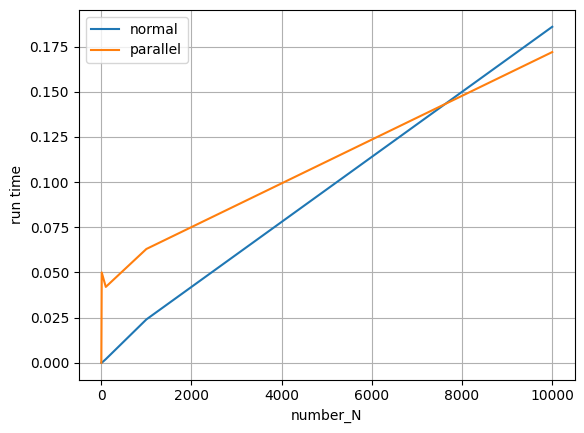

In [ ]:
thres = 4
plt.plot(report.loc[:thres, 'number'], report.loc[:thres, 'normal'], label= 'normal')
plt.plot(report.loc[:thres, 'number'], report.loc[:thres, 'parallel'], label= 'parallel')

plt.legend()
plt.xlabel('number_N')
plt.ylabel('run time')
plt.grid()

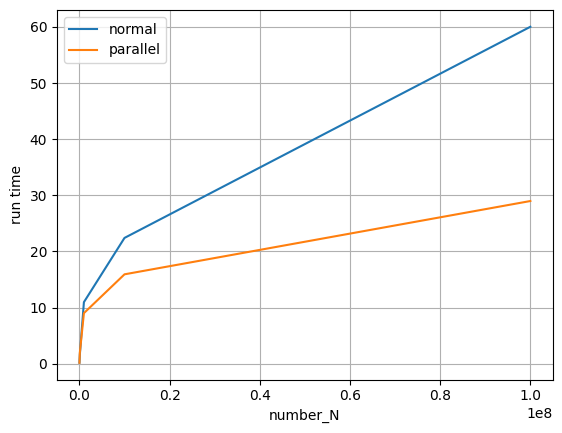

In [ ]:
plt.plot(report.loc[thres:, 'number'], report.loc[thres:, 'normal'], label= 'normal')
plt.plot(report.loc[thres:, 'number'], report.loc[thres:, 'parallel'], label= 'parallel')

plt.legend()
plt.xlabel('number_N')
plt.ylabel('run time')
plt.grid()

In [ ]:
print('mean time of normal is: ', f"{np.mean(report.loc[:, 'normal']):.3f}")
print('mean time of parallel is: ', f"{np.mean(report.loc[:, 'parallel']):.3f}")

mean time of normal is:  10.587
mean time of parallel is:  6.249


## **Conclude:**
- **Hardware affect**: We can rely on the availability of multiple CPUs in a computer to design parallel algorithms to optimize performance.
- **Python Framework**: In Python, we can use the multiprocessing library and the Pool class.
- **Pattern**: Generally, to perform a parallel algorithm, we need to divide the data into independent parts, perform calculations on each part simultaneously, and combine the results.

- **Comment**: In the above report, We can observe that the speed of the parallel merge sort algorithm depends on the size of the dataset. In some cases, when the dataset is small, even the parallel version may have lower performance than the original version of merge sort. The reason is the overhead required to initialize the parallel process. However, for large datasets, parallel merge sort yields significantly better results by leveraging the simultaneous execution time of the data subsets.

- Beside, Depending on the hardware device such as ***NUMBER_PROCESSOR*** and the implementation method can yield impressive results on larger datasets with parallel algorithms.

In [ ]:
print('thank you')

thank you
